In [1]:
import numpy as np
import pandas as pd
import pymc3 as pm
import requests


C:\Users\DESUSAI\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
df = pd.read_csv("C:/Users/DESUSAI/Desktop/New folder/Fifa2018.csv",sep=';')
rslt = pd.read_csv("C:/Users/DESUSAI/Desktop/New folder/results.csv",sep=',')

rslt

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


In [3]:
df

,Group,Team
0,A,Russia
1,A,Uruguay
2,A,Egypt
3,A,Saudi Arabia
4,B,Spain
5,B,Portugal
6,B,Iran
7,B,Morocco
8,C,France
9,C,Denmark


In [4]:
rslt = rslt.loc[:,'date':'away_score']
rslt

,date,home_team,away_team,home_score,away_score
0,1872-11-30,Scotland,England,0,0
1,1873-03-08,England,Scotland,4,2
2,1874-03-07,Scotland,England,2,1
3,1875-03-06,England,Scotland,2,2
4,1876-03-04,Scotland,England,3,0
5,1876-03-25,Scotland,Wales,4,0
6,1877-03-03,England,Scotland,1,3
7,1877-03-05,Wales,Scotland,0,2
8,1878-03-02,Scotland,England,7,2
9,1878-03-23,Scotland,Wales,9,0


In [5]:
rslt

,date,home_team,away_team,home_score,away_score
0,1872-11-30,Scotland,England,0,0
1,1873-03-08,England,Scotland,4,2
2,1874-03-07,Scotland,England,2,1
3,1875-03-06,England,Scotland,2,2
4,1876-03-04,Scotland,England,3,0
5,1876-03-25,Scotland,Wales,4,0
6,1877-03-03,England,Scotland,1,3
7,1877-03-05,Wales,Scotland,0,2
8,1878-03-02,Scotland,England,7,2
9,1878-03-23,Scotland,Wales,9,0


In [6]:
def update(x,y):
    for j in range(0,len(rslt.home_team)):
        if (rslt.home_team[j]==y):
            rslt.at[j,'HomeGroup']=x
        if (rslt.away_team[j]==y):
            rslt.at[j,'AwayGroup']=x
            
    

for i in range(0,len(df.Group)):
    update(df.Group[i],df.Team[i])
    
    

In [7]:
i=0
j=0

k=0

def updatestats(TeamName):
    goalscored=0
    goalconceded=0
    noofmatch=0
    for j in range(0,len(rslt.home_team)):
        if (rslt.home_team[j]==TeamName):
            goalscored+=rslt.home_score[j]
            goalconceded+=rslt.away_score[j]
            noofmatch+=1 
        if (rslt.away_team[j]==TeamName):
            goalscored+=rslt.away_score[j]
            goalconceded+=rslt.home_score[j]
            noofmatch+=1
    
    
    for K in range(0,len(df.Team)):
        if (df.Team[K]==TeamName):
            df.at[K,'goal_scored']=goalscored        
            df.at[K,'goal_conceded']=goalconceded  
            df.at[K,'No_of_matches']=noofmatch


for i in range(0,len(df.Team)):
      updatestats(df.Team[i])
    

In [8]:
df

,Group,Team,goal_scored,goal_conceded,No_of_matches
0,A,Russia,1154.0,649.0,674.0
1,A,Uruguay,1361.0,1082.0,864.0
2,A,Egypt,992.0,629.0,616.0
3,A,Saudi Arabia,939.0,640.0,594.0
4,B,Spain,1336.0,610.0,674.0
5,B,Portugal,997.0,699.0,597.0
6,B,Iran,881.0,391.0,481.0
7,B,Morocco,708.0,430.0,508.0
8,C,France,1445.0,1083.0,817.0
9,C,Denmark,1380.0,1080.0,778.0


In [9]:
df['difference'] = df['goal_scored']-df['goal_conceded']


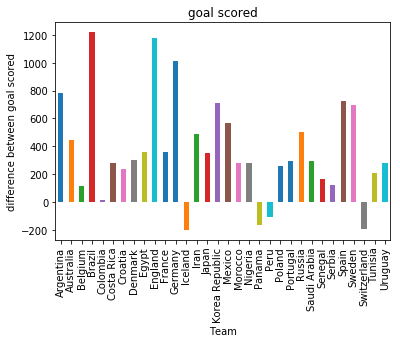

In [10]:
(df.groupby('Team')['difference']
      .mean()
      .plot(kind='bar', title='goal scored', yerr=df.groupby('Team')['difference'].std())
      .set_ylabel('difference between goal scored'));


In [11]:
i=0
K=0
j=0
global Team1
global Team2
Team1 = pd.DataFrame(columns=['Group'])
for K in range(0,len(df.Group)-1):
    i=K+1
    while ((df.Group[K])==(df.Group[i])):
        model = pm.Model();
        with model:
            GoalScoredTeam1 = pm.Poisson("GoalScoredTeam1",df.goal_scored[K]/df.No_of_matches[K])
            GoalConcededTeam1 = pm.Poisson("GoalConcededTeam1",df.goal_conceded[K]/df.No_of_matches[K])
            GoalScoredTeam2 = pm.Poisson("GoalScoredTeam2",df.goal_scored[i]/df.No_of_matches[i])
            GoalConcededTeam2 = pm.Poisson("GoalConcededTeam2",df.goal_conceded[i]/df.No_of_matches[i])
            Team1Win = pm.Poisson("Team1Win",GoalScoredTeam1+GoalConcededTeam2)
            Team2Win = pm.Poisson("Team2Win",GoalScoredTeam2+GoalConcededTeam1)
            trace= pm.sample(1000,tune=500,progressbar=True)
            Team1.at[j,'Group']=df.Group[K]
            Team1.at[j,'Home_Team']=df.Team[K]
            Team1.at[j,'Away_Team']=df.Team[i]                                  
            Team1.at[j,'HomeWon']=trace['Team1Win'].mean()
            Team1.at[j,'AwayWon']=trace['Team2Win'].mean()
            Team1.at[j,'Goal_scored_Home']=trace['GoalScoredTeam1'].mean()
            Team1.at[j,'Goal_scored_Away']=trace['GoalScoredTeam2'].mean()
            i+=1
            j+=1
            if(i==len(df.Group)):
                i=k+1
                
            



Assigned Metropolis to GoalScoredTeam1
Assigned Metropolis to GoalConcededTeam1
Assigned Metropolis to GoalScoredTeam2
Assigned Metropolis to GoalConcededTeam2
Assigned Metropolis to Team1Win
Assigned Metropolis to Team2Win
100%|█████████████████████████████████████| 1500/1500 [00:03<00:00, 403.65it/s]
Assigned Metropolis to GoalScoredTeam1
Assigned Metropolis to GoalConcededTeam1
Assigned Metropolis to GoalScoredTeam2
Assigned Metropolis to GoalConcededTeam2
Assigned Metropolis to Team1Win
Assigned Metropolis to Team2Win
100%|█████████████████████████████████████| 1500/1500 [00:03<00:00, 447.24it/s]
Assigned Metropolis to GoalScoredTeam1
Assigned Metropolis to GoalConcededTeam1
Assigned Metropolis to GoalScoredTeam2
Assigned Metropolis to GoalConcededTeam2
Assigned Metropolis to Team1Win
Assigned Metropolis to Team2Win
100%|█████████████████████████████████████| 1500/1500 [00:03<00:00, 415.06it/s]
Assigned Metropolis to GoalScoredTeam1
Assigned Metropolis to GoalConcededTeam1
Assigned

100%|█████████████████████████████████████| 1500/1500 [00:03<00:00, 439.33it/s]
Assigned Metropolis to GoalScoredTeam1
Assigned Metropolis to GoalConcededTeam1
Assigned Metropolis to GoalScoredTeam2
Assigned Metropolis to GoalConcededTeam2
Assigned Metropolis to Team1Win
Assigned Metropolis to Team2Win
100%|█████████████████████████████████████| 1500/1500 [00:03<00:00, 428.46it/s]
Assigned Metropolis to GoalScoredTeam1
Assigned Metropolis to GoalConcededTeam1
Assigned Metropolis to GoalScoredTeam2
Assigned Metropolis to GoalConcededTeam2
Assigned Metropolis to Team1Win
Assigned Metropolis to Team2Win
100%|█████████████████████████████████████| 1500/1500 [00:03<00:00, 415.41it/s]
Assigned Metropolis to GoalScoredTeam1
Assigned Metropolis to GoalConcededTeam1
Assigned Metropolis to GoalScoredTeam2
Assigned Metropolis to GoalConcededTeam2
Assigned Metropolis to Team1Win
Assigned Metropolis to Team2Win
100%|█████████████████████████████████████| 1500/1500 [00:03<00:00, 418.96it/s]
Assigned

In [12]:
Team1

,Group,Home_Team,Away_Team,HomeWon,AwayWon,Goal_scored_Home,Goal_scored_Away
0,A,Russia,Uruguay,2.821,2.300,1.772,1.276
1,A,Russia,Egypt,2.882,2.697,1.870,1.522
2,A,Russia,Saudi Arabia,3.100,2.318,1.815,1.343
3,A,Uruguay,Egypt,2.672,2.490,1.533,1.469
4,A,Uruguay,Saudi Arabia,2.297,2.661,1.557,1.638
5,A,Egypt,Saudi Arabia,2.500,2.517,1.499,1.454
6,B,Spain,Portugal,2.437,2.207,1.516,1.589
7,B,Spain,Iran,2.835,2.028,2.030,1.551
8,B,Spain,Morocco,3.101,1.630,2.050,1.129
9,B,Portugal,Iran,2.181,2.931,1.501,1.989


In [13]:
GroupR = pd.DataFrame(df.Group,columns=['Group'])
GroupR['Team'] = df['Team']
i=0
j=0
k=0
for i in range(0,len(GroupR)-1):    
    hwon=0      
    hgoalScored=0       
    AgoalScored=0            
    while(j<=len(Team1)-1) and (GroupR.Team[i] == Team1.Home_Team[j]):       
        hgoalScored+=Team1.Goal_scored_Home[j]
        GroupR.at[i,'GoalScored'] =hgoalScored
        AgoalScored+=Team1.Goal_scored_Away[j]
        GroupR.at[i,'GoalConceded']=AgoalScored 
        if (Team1.HomeWon[j]>Team1.AwayWon[j]):
            hwon +=3 
            GroupR.at[i,'Points'] = hwon                       
        j+=1        
    for k in range(0,len(Team1)-1):    
        if (GroupR.Team[i]==Team1.Away_Team[k]):           
            hgoalScored+=Team1.Goal_scored_Away[k]        
            AgoalScored+=Team1.Goal_scored_Home[k]
            GroupR.at[i,'GoalConceded']=hgoalScored 
            GroupR.at[i,'GoalScored'] =AgoalScored
            if (Team1.HomeWon[k]<Team1.AwayWon[k]):
                hwon +=3 
                GroupR.at[i,'Points'] = hwon              
                
                
                
 
    GroupR.fillna(0) 

In [14]:
GroupR = GroupR.fillna(0)

In [15]:
GroupR

,Group,Team,GoalScored,GoalConceded,Points
0,A,Russia,5.457,4.141,9.0
1,A,Uruguay,4.879,4.366,3.0
2,A,Egypt,4.857,4.490,0.0
3,A,Saudi Arabia,4.871,4.435,6.0
4,B,Spain,5.596,4.269,9.0
5,B,Portugal,4.980,4.734,0.0
6,B,Iran,4.961,5.459,6.0
7,B,Morocco,5.613,4.034,3.0
8,C,France,5.306,4.893,3.0
9,C,Denmark,5.291,4.805,3.0


In [16]:
QualifiedperQtr=GroupR.sort_values(['Group','Points','GoalScored'],ascending=False)

QualifiedperQtr=QualifiedperQtr.reset_index(drop=True)
QualifiedperQtr


,Group,Team,GoalScored,GoalConceded,Points
0,H,Senegal,5.043,4.306,6.0
1,H,Japan,4.436,5.120,6.0
2,H,Colombia,3.679,4.239,0.0
3,H,Poland,0.000,0.000,0.0
4,G,England,3.949,6.468,9.0
5,G,Belgium,5.106,4.482,6.0
6,G,Tunisia,5.268,4.340,3.0
7,G,Panama,5.486,3.271,0.0
8,F,Germany,5.304,6.678,9.0
9,F,Korea Republic,5.956,5.179,3.0


In [17]:
QualifiedperQtr=QualifiedperQtr.groupby('Group').head(2)
QualifiedperQtr=QualifiedperQtr.sort_values(['Group','Points'],ascending=False)
QualifiedperQtr=QualifiedperQtr.reset_index(drop=True)
QualifiedperQtr


,Group,Team,GoalScored,GoalConceded,Points
0,H,Senegal,5.043,4.306,6.0
1,H,Japan,4.436,5.120,6.0
2,G,England,3.949,6.468,9.0
3,G,Belgium,5.106,4.482,6.0
4,F,Germany,5.304,6.678,9.0
5,F,Korea Republic,5.956,5.179,3.0
6,E,Brazil,7.087,4.414,9.0
7,E,Serbia,5.462,4.613,6.0
8,D,Argentina,4.564,5.646,9.0
9,D,Croatia,5.566,4.784,6.0


Senegal Belgium


Assigned Metropolis to Team1GoalScored
Assigned Metropolis to Team1GoalConceded
Assigned Metropolis to Team2GoalScored
Assigned Metropolis to Team2GoalConceded
Assigned Metropolis to PerQtr1Win
Assigned Metropolis to PerQtr2Win
100%|█████████████████████████████████████| 1500/1500 [00:03<00:00, 402.52it/s]


Japan England


Assigned Metropolis to Team1GoalScored
Assigned Metropolis to Team1GoalConceded
Assigned Metropolis to Team2GoalScored
Assigned Metropolis to Team2GoalConceded
Assigned Metropolis to PerQtr1Win
Assigned Metropolis to PerQtr2Win
100%|█████████████████████████████████████| 1500/1500 [00:03<00:00, 449.91it/s]


England Korea Republic


Assigned Metropolis to Team1GoalScored
Assigned Metropolis to Team1GoalConceded
Assigned Metropolis to Team2GoalScored
Assigned Metropolis to Team2GoalConceded
Assigned Metropolis to PerQtr1Win
Assigned Metropolis to PerQtr2Win
100%|█████████████████████████████████████| 1500/1500 [00:03<00:00, 476.16it/s]


Belgium Germany


Assigned Metropolis to Team1GoalScored
Assigned Metropolis to Team1GoalConceded
Assigned Metropolis to Team2GoalScored
Assigned Metropolis to Team2GoalConceded
Assigned Metropolis to PerQtr1Win
Assigned Metropolis to PerQtr2Win
100%|█████████████████████████████████████| 1500/1500 [00:03<00:00, 400.69it/s]


Germany Serbia


Assigned Metropolis to Team1GoalScored
Assigned Metropolis to Team1GoalConceded
Assigned Metropolis to Team2GoalScored
Assigned Metropolis to Team2GoalConceded
Assigned Metropolis to PerQtr1Win
Assigned Metropolis to PerQtr2Win
100%|█████████████████████████████████████| 1500/1500 [00:03<00:00, 389.30it/s]


Korea Republic Brazil


Assigned Metropolis to Team1GoalScored
Assigned Metropolis to Team1GoalConceded
Assigned Metropolis to Team2GoalScored
Assigned Metropolis to Team2GoalConceded
Assigned Metropolis to PerQtr1Win
Assigned Metropolis to PerQtr2Win
100%|█████████████████████████████████████| 1500/1500 [00:03<00:00, 397.88it/s]


Brazil Croatia


Assigned Metropolis to Team1GoalScored
Assigned Metropolis to Team1GoalConceded
Assigned Metropolis to Team2GoalScored
Assigned Metropolis to Team2GoalConceded
Assigned Metropolis to PerQtr1Win
Assigned Metropolis to PerQtr2Win
100%|█████████████████████████████████████| 1500/1500 [00:02<00:00, 502.04it/s]


Serbia Argentina


Assigned Metropolis to Team1GoalScored
Assigned Metropolis to Team1GoalConceded
Assigned Metropolis to Team2GoalScored
Assigned Metropolis to Team2GoalConceded
Assigned Metropolis to PerQtr1Win
Assigned Metropolis to PerQtr2Win


KeyboardInterrupt: 

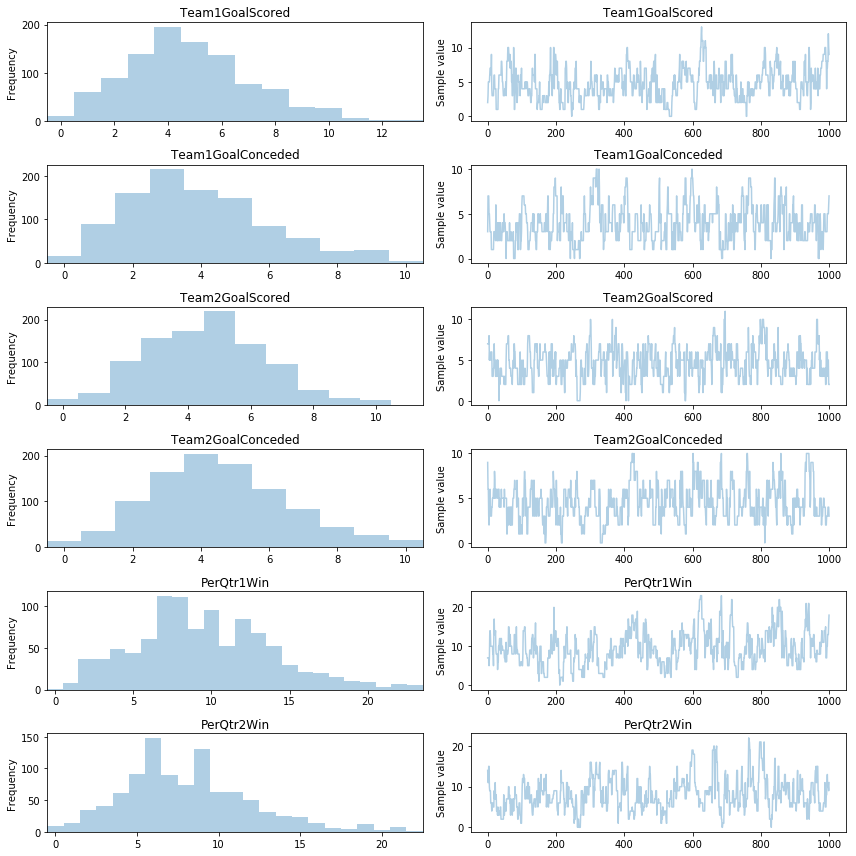

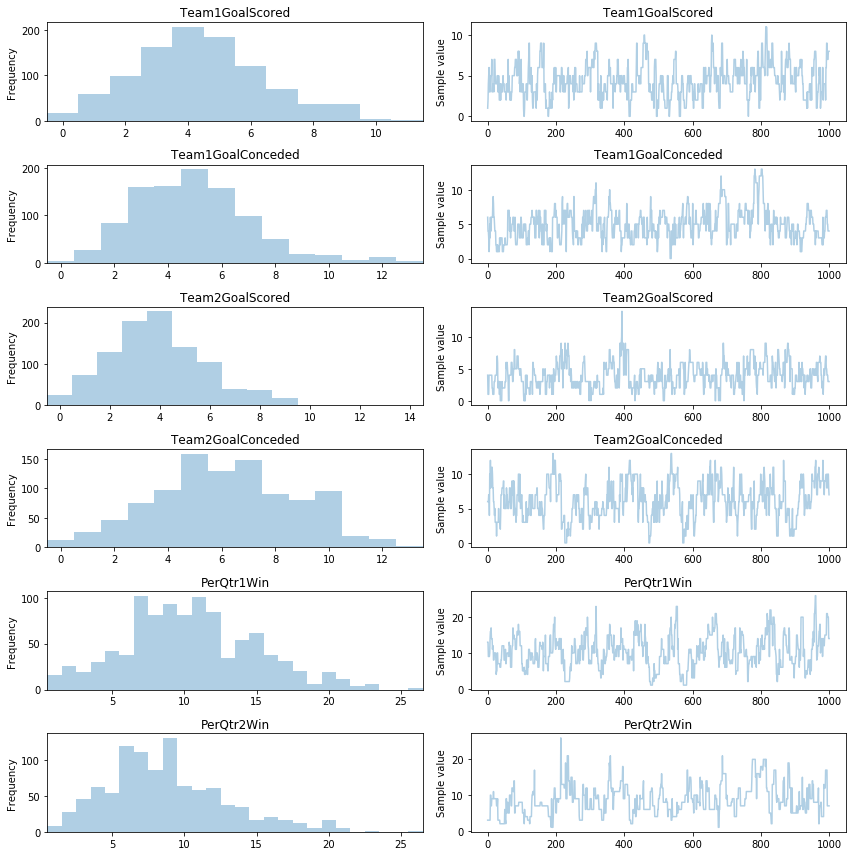

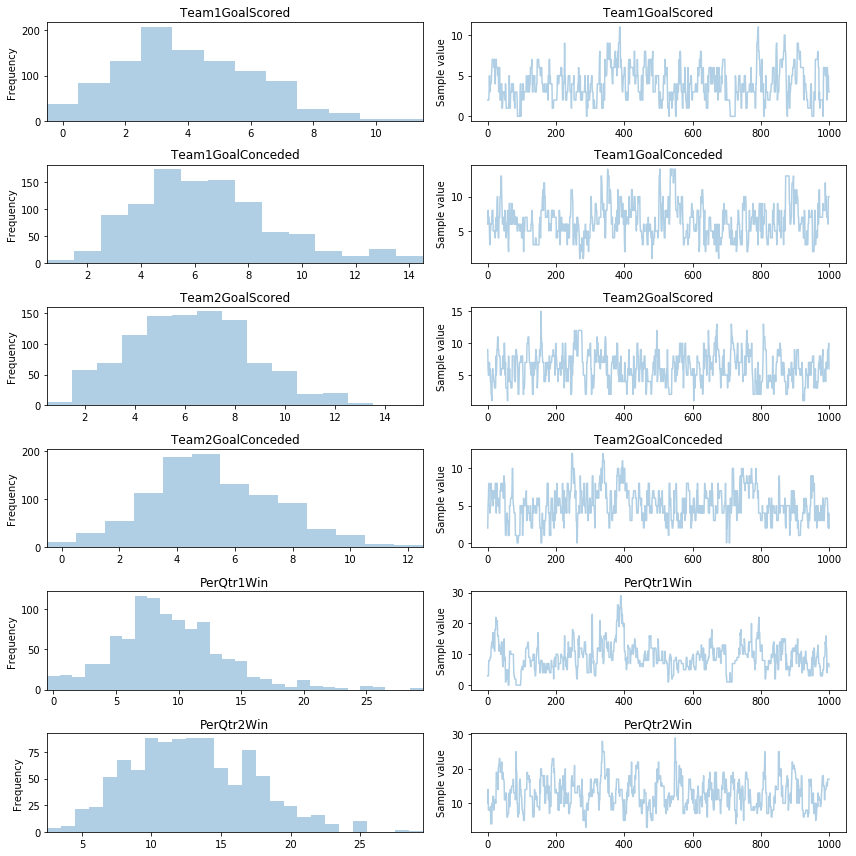

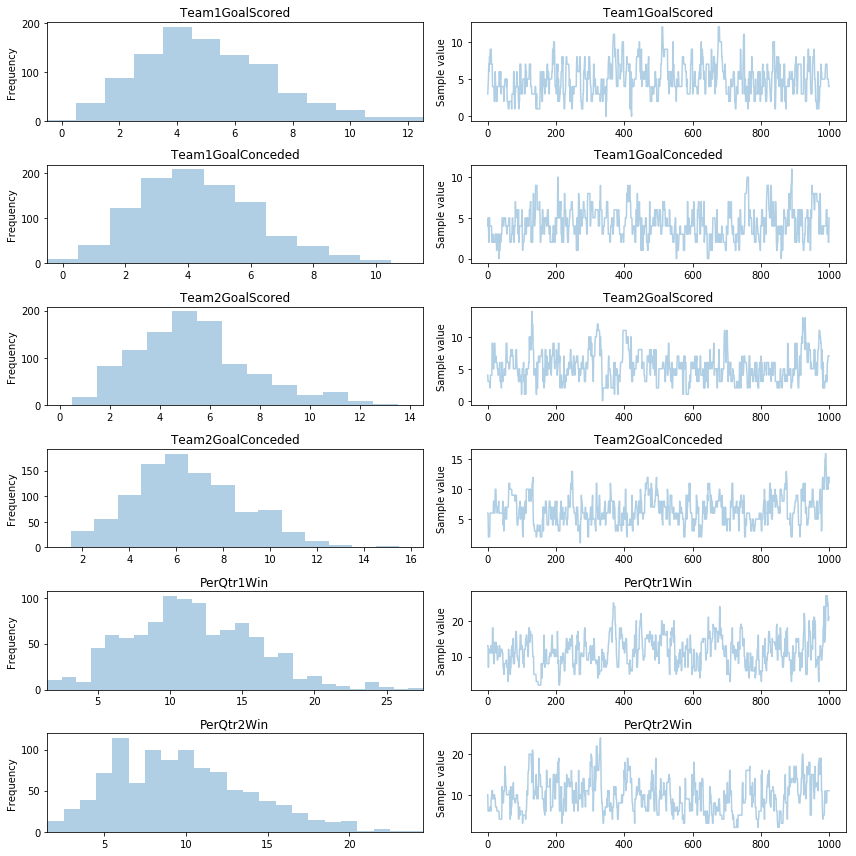

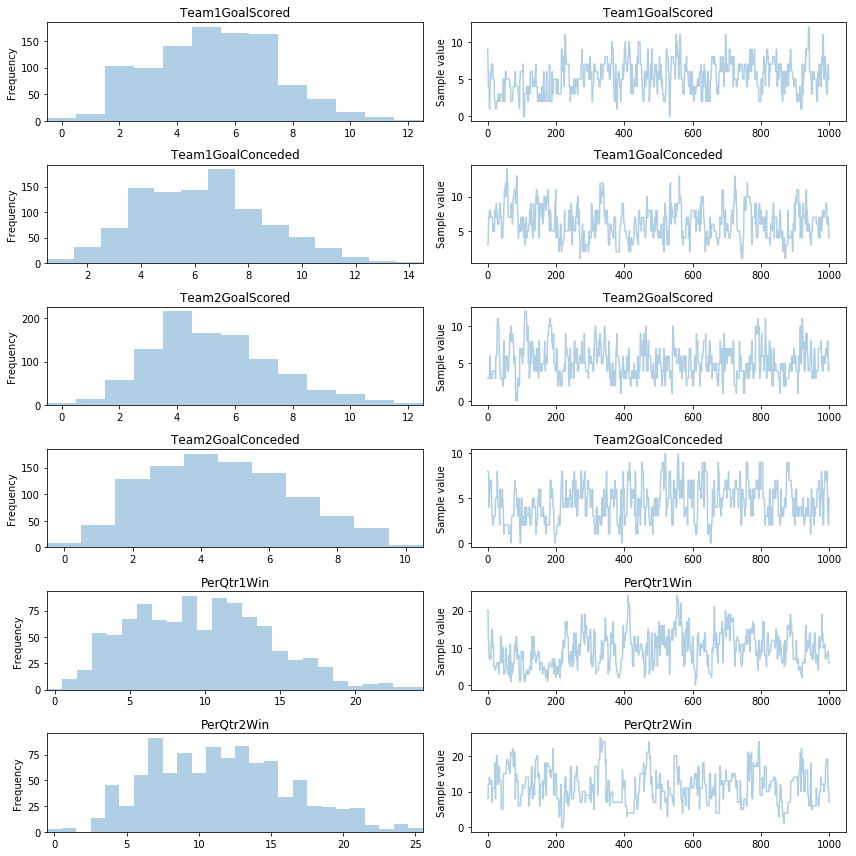

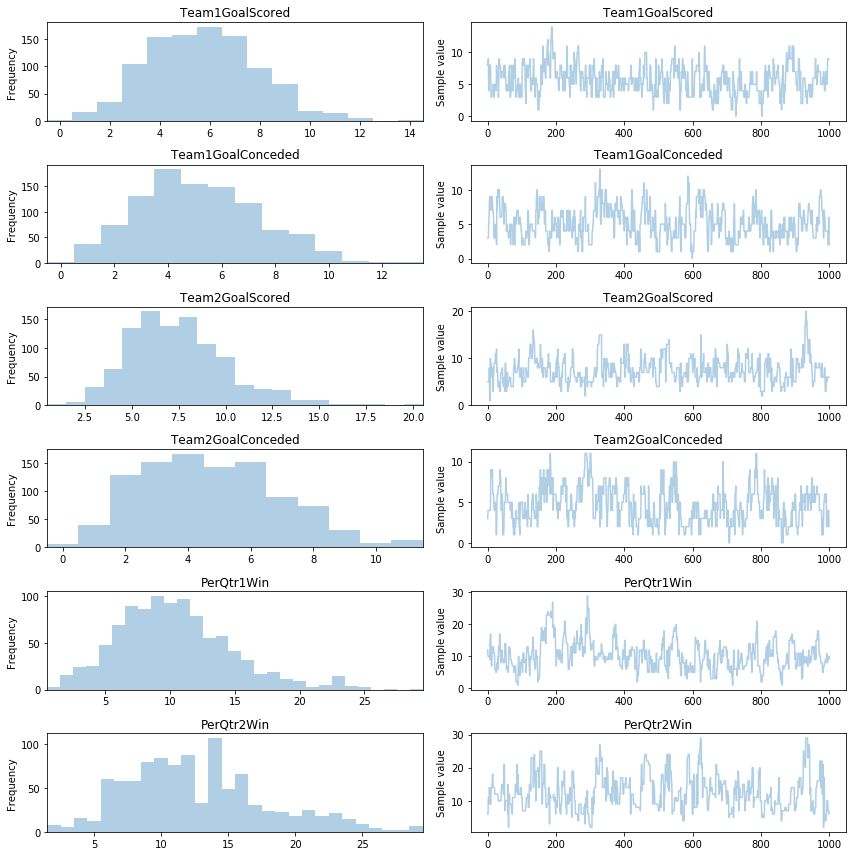

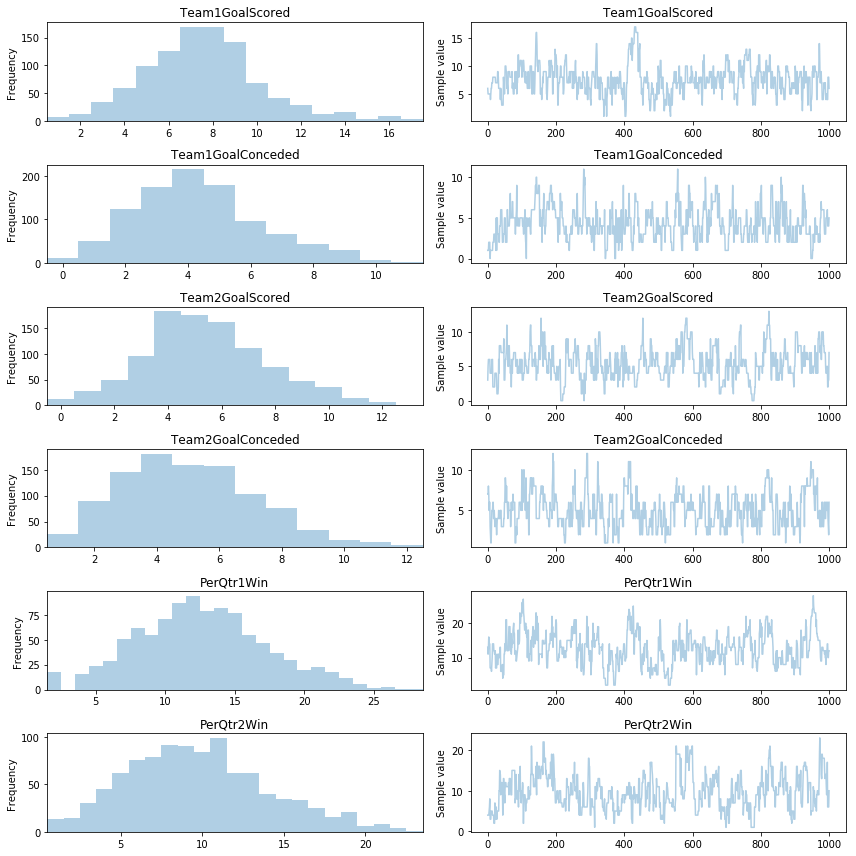

In [24]:
i=0
j=0
PreQtrR = pd.DataFrame(columns=['Home_Team'])
for i in range(0,len(QualifiedperQtr)-2):
    j=0    
    if (i % 2 == 0):       
        j=i+3        
    if (i % 2 != 0):
        j=i+1  
    print(QualifiedperQtr.Team[i],QualifiedperQtr.Team[j])
    for k in range(0,7):
        
        PreQtr = pm.Model();
        with PreQtr:
            Team1GoalScored = pm.Poisson('Team1GoalScored',QualifiedperQtr.GoalScored[i])
            Team1GoalConceded = pm.Poisson('Team1GoalConceded',QualifiedperQtr.GoalConceded[i])
            Team2GoalScored = pm.Poisson('Team2GoalScored',QualifiedperQtr.GoalScored[j])
            Team2GoalConceded = pm.Poisson('Team2GoalConceded',QualifiedperQtr.GoalConceded[j])
            PerQtr1Win = pm.Poisson('PerQtr1Win',Team1GoalScored+Team2GoalConceded)
            PerQtr2Win = pm.Poisson('PerQtr2Win',Team2GoalScored+Team1GoalConceded)
            trace2= pm.sample(1000,tune=500,progressbar=True)        
            PreQtrR.at[k,'Home_Team']=QualifiedperQtr.Team[i]
            PreQtrR.at[k,'Away_Team']=QualifiedperQtr.Team[j]                                  
            PreQtrR.at[k,'HomeWon']=trace2['PerQtr1Win'].mean()
            PreQtrR.at[k,'AwayWon']=trace2['PerQtr2Win'].mean()
            PreQtrR.at[k,'Goal_scored_Home']=trace2['Team1GoalScored'].mean()
            PreQtrR.at[k,'Goal_scored_Away']=trace2['Team2GoalScored'].mean()
            if (i % 2 != 0):
                i=i+3
            pm.traceplot(trace2)

    
    
    


In [23]:
PreQtrR

,Home_Team,Away_Team,HomeWon,AwayWon,Goal_scored_Home,Goal_scored_Away
0,Senegal,Belgium,8.675,9.863,4.818,5.168
1,Japan,England,10.918,9.575,4.280,4.108
2,England,Korea Republic,9.025,11.768,3.942,5.718
3,Belgium,Germany,11.911,10.124,5.271,5.285
4,Germany,Serbia,10.842,12.017,5.677,5.338
5,Korea Republic,Brazil,10.177,12.044,5.464,7.145
6,Brazil,Croatia,12.163,10.714,7.238,5.817
7,Serbia,Argentina,10.204,9.641,5.142,4.648
8,Argentina,France,9.356,11.433,4.633,5.175
9,Croatia,Australia,11.530,9.396,5.376,4.788
